# Example notebook to showcase the usage of the Poisson VAE model

We showcase the model on a 10X ATAC sample dataset. The data can be downloaded from [here](https://www.10xgenomics.com/resources/datasets/10k-human-pbmcs-atac-v2-chromium-controller-2-standard).

## Load packages

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import scanpy as sc
import anndata as ad

You can install a forked version of `scvi-tools` with the Poisson VAE model from `https://github.com/lauradmartens/scvi-tools`. We will try to merge it with `scvi-tools` soon.
Run `pip install .` in the cloned repository.

In [ ]:
import scvi

You will only need the `poisson_atac` package for diagnostic plots (e.g. distribution of counts). You can install the `poisson_atac` package from `https://github.com/theislab/scatac_poisson_reproducibility`.
Run `pip install .` in the cloned repository.

In [ ]:
import poisson_atac as patac

In [ ]:
data_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/data'

## Load the data

In [ ]:
adata = sc.read_10x_h5(os.path.join(data_path, '10X/10k_Human_PBMCs_ATAC_v2_Chromium_Controller', '10k_pbmc_ATACv2_nextgem_Chromium_Controller_filtered_peak_bc_matrix.h5'), gex_only=False)

## Plot count distributions

In [ ]:
patac.pl.count_distribution(adata, figsize=(12, 5), limit=80)

In [ ]:
patac.pl.proportions(adata, lower_limit=1, upper_limit=2)

In [ ]:
patac.pl.mean_variance(adata, figsize=(6,6))

## Convert to fragment counts

In [ ]:
scvi.model.POISSONVI.reads_to_fragments(adata)

## Setup PoissonVAE model

The model is based on the scvi models. They have a great documentation at https://scvi-tools.org/. Here you will also find more information on the parameters you can use in the setup and training of the model.

In [ ]:
scvi.model.POISSONVI.setup_anndata(adata, layer="counts") # if you have batches use batch='batch_key'

In [ ]:
model = scvi.model.POISSONVI(adata)

In [ ]:
model

## Train PoissonVAE model

In [ ]:
model.train(train_size=0.8, validation_size=0.1)

## Save model

In [ ]:
model.save('python_model.p')

## Compute and plot embedding

In [15]:
# Get latent embedding of cells
X_emb = model.get_latent_representation(adata)
adata.obsm['X_emb'] = X_emb

In [16]:
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

In [17]:
sc.tl.leiden(adata)

/home/icb/laura.martens/miniconda3/envs/scvi-tools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


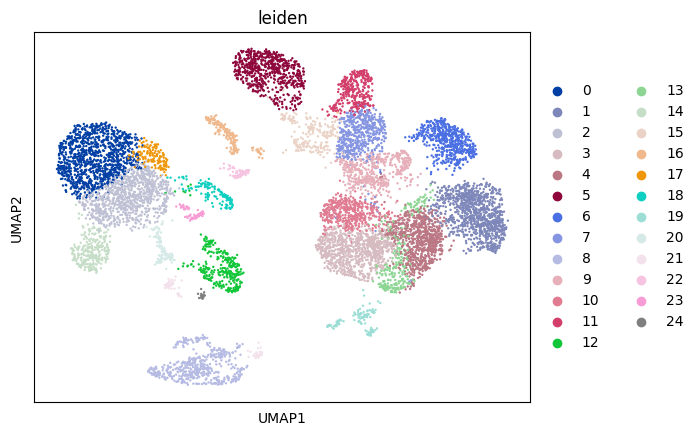

In [18]:
sc.pl.umap(adata, color="leiden")